In [95]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [96]:
tweets = pd.read_csv('all_tweets.csv')
print("Tweets Shape :", tweets.shape)
print('Columns are:',tweets.columns)
tweets.head()

Tweets Shape : (11356, 6)
Columns are: Index(['id', 'Date', 'Likes', 'RTs', 'tweet', 'length'], dtype='object')


,id,Date,Likes,RTs,tweet,length
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166


In [97]:
# No missing value
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11356 entries, 0 to 11355
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11356 non-null  int64 
 1   Date    11356 non-null  object
 2   Likes   11356 non-null  int64 
 3   RTs     11356 non-null  int64 
 4   tweet   11356 non-null  object
 5   length  11356 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 532.4+ KB


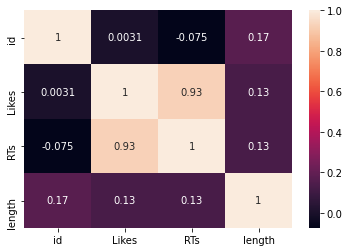

In [98]:
 #calculer le coefficient de corrélation de chaque paire de variables 
corr_matrix = tweets.corr()
sns.heatmap(corr_matrix, annot=True)

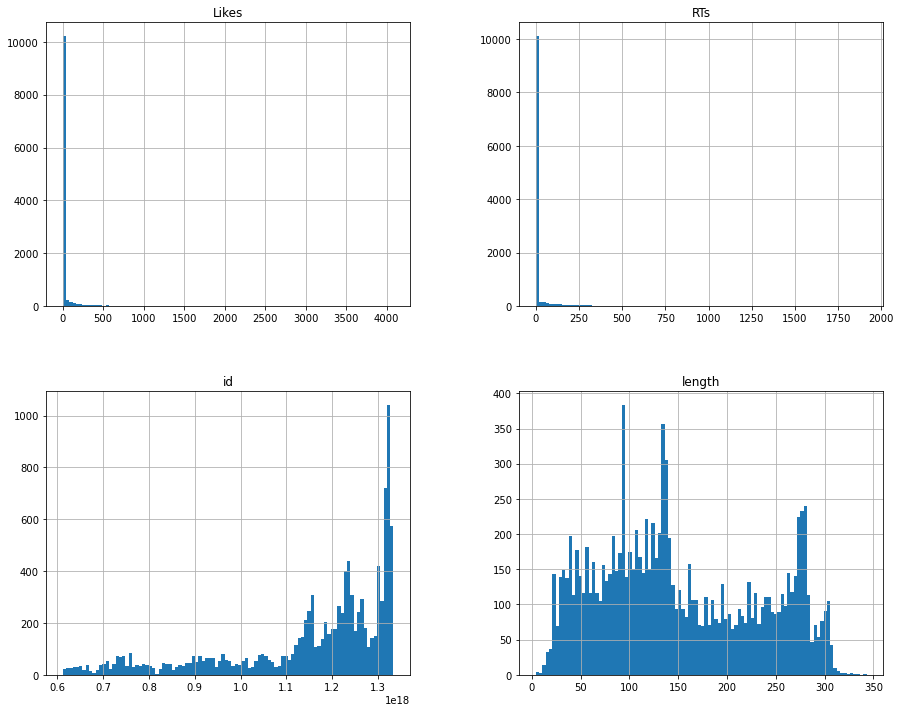

In [99]:
tweets.hist(bins=100, figsize=(15,12))
plt.show()

In [100]:
tweets_with_hashtags = tweets.loc[tweets["tweet"].str.contains("#")]
tweets_with_hashtags


,id,Date,Likes,RTs,tweet,length
128,1314403974976614405,2020-10-09 03:15:02,0,0,#HotTakesExposed https://t.co/4L2v0JdhUD,40
129,1314395443342848001,2020-10-09 02:41:08,0,0,"@realDonaldTrump @jack @TwitterComms @TwitterSupport Look @jack, I know Twitter makes revenue th...",328
185,1313869238315241473,2020-10-07 15:50:11,0,0,"Oh great, Trump took his hourly shit on the Constitution again. It would be awesome if any of hi...",181
252,1311122264620965889,2020-09-30 01:54:42,0,0,TREND IT MOTHERFUCKERS #CUTHISMIC,33
265,1311109509163745280,2020-09-30 01:04:00,0,1,#Debate2020 hope: I'd love to see Trump suffer a fatal heart attack tonight tbh. That would be t...,113
...,...,...,...,...,...,...
11085,1156368082207686658,2019-07-31 00:56:49,0,0,"Steve Bullock maintains the appearance and charm of a failed gym teacher. So, tbh, that means me...",154
11093,1156357518685347846,2019-07-31 00:14:51,0,0,"So is the haghtag for this #MassDebation? Or, like, no?",55
11100,1155312039092531200,2019-07-28 03:00:29,0,0,"If you're in Baltimore and not a local, you're going to be in Fell's Point anyway. (Trust me.) G...",180
11187,1148785769995284485,2019-07-10 02:47:25,0,1,"While people pile onto the #USWNT about her not being willing to visit the White House, nobody i...",242


In [101]:
tweets_with_url= tweets.loc[tweets["tweet"].str.contains("https")]
tweets_with_url


,id,Date,Likes,RTs,tweet,length
6,1330590370275659776,2020-11-22 19:14:00,0,0,"Chuck Re-Todd is at it again, I see. \n\nhttps://t.co/o9BsCPGyyH",62
8,1330191836086988802,2020-11-21 16:50:22,0,0,"Point taken, and I can't say Rebecca's point doesn't have its own validity that I can't argue ag...",292
9,1329574242283884546,2020-11-19 23:56:16,1,0,There are no words to accurately express just how much of a piece of shit she is. \n\nhttps://t....,107
14,1328392209100644354,2020-11-16 17:39:17,0,0,The student loan forgiveness should include people who've already paid off their student loans. ...,212
15,1328337808424128512,2020-11-16 14:03:07,0,0,"Moderates: ""People like Jamie Harrison have all the charm of a used car salesman with an uncomfo...",280
...,...,...,...,...,...,...
11351,1115747166255972353,2019-04-09 22:43:48,0,1,New Walter Blog: 2019 Red Sox season ovah? Does this headline have a clickbait erection? WHEN DO...,165
11352,1114295211105103872,2019-04-05 22:34:15,0,0,"What an ironic statement from a person that Fox News hands out jobs to: young, female, and blond...",197
11353,1114215320305246208,2019-04-05 17:16:48,0,1,New Walter Blog: What’s the point of this blog? What’s the point of anything? What is life? TELL...,128
11354,1114205217376096256,2019-04-05 16:36:39,0,0,"@realDonaldTrump I'm very sorry to tell you this, but you appear to be suffering from a mental i...",195


## Pre-processing text data¶


### Remove punctuations

In [102]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [103]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub('http\S+','',text)
    text = re.sub('\n+','',text)
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, "", text)
    text= text.lower()
    return text

tweets['Tweet_punct'] = tweets['tweet'].apply(lambda x: remove_punct(x))
tweets.head(10)


,id,Date,Likes,RTs,tweet,length,Tweet_punct
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268,another break from my trademark negativity bidens press conference are boring they contain littl...
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166,taking a break from my trademark negativity about checks notes well everything biden elevating c...
5,1330590942676602880,2020-11-22 19:16:16,0,1,"The difference between Chuck Todd and other ""journalists"" who are just as crappy is that those o...",269,the difference between chuck todd and other journalists who are just as crappy is that those oth...
6,1330590370275659776,2020-11-22 19:14:00,0,0,"Chuck Re-Todd is at it again, I see. \n\nhttps://t.co/o9BsCPGyyH",62,chuck retodd is at it again i see
7,1330192365978578951,2020-11-21 16:52:28,0,0,"I know that we, being collected under this massive tent that's called the Democratic Party, are ...",278,i know that we being collected under this massive tent thats called the democratic party are use...
8,1330191836086988802,2020-11-21 16:50:22,0,0,"Point taken, and I can't say Rebecca's point doesn't have its own validity that I can't argue ag...",292,point taken and i cant say rebeccas point doesnt have its own validity that i cant argue against...
9,1329574242283884546,2020-11-19 23:56:16,1,0,There are no words to accurately express just how much of a piece of shit she is. \n\nhttps://t....,107,there are no words to accurately express just how much of a piece of shit she is


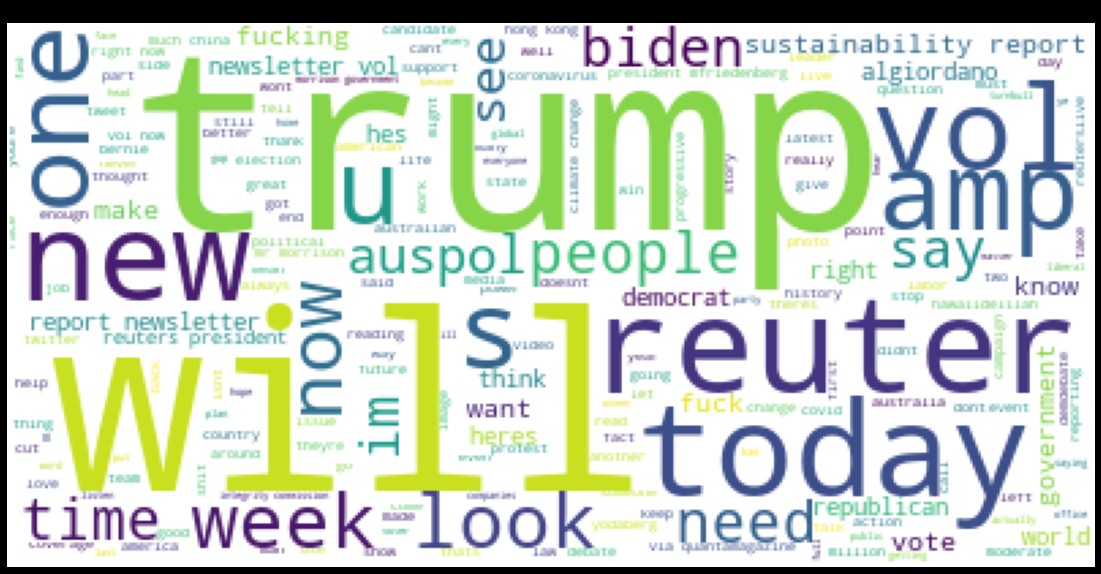

In [104]:
from wordcloud import WordCloud, STOPWORDS
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Good Morning Datascience+")
    
wordcloud(tweets,'Tweet_punct')  

### Tokenization

In [105]:
def tokenization(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.split('\W+', text)
  
    return text

tweets['Tweet_tokenized'] = tweets['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
tweets.head()

,id,Date,Likes,RTs,tweet,length,Tweet_punct,Tweet_tokenized
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...,"[i, dont, even, remember, if, i, sent, bernie, money, but, i, fucking, remember, sending, amy, s..."
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...,"[wally, are, you, being, hyperbolicno, im, a, hardcore, lefty, who, donated, to, amy, klobuchar,..."
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268,another break from my trademark negativity bidens press conference are boring they contain littl...,"[another, break, from, my, trademark, negativity, bidens, press, conference, are, boring, they, ..."
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...,"[robbystarbuck, realdonaldtrump, biden, got, more, votes, you, do, realize, that, right, or, are..."
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166,taking a break from my trademark negativity about checks notes well everything biden elevating c...,"[taking, a, break, from, my, trademark, negativity, about, checks, notes, well, everything, bide..."


### Remove stopwords

In [106]:
import nltk 
#download the stopwords from nltk using 
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Client\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [108]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tweets['Tweet_nonstop'] = tweets['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
tweets.head()

,id,Date,Likes,RTs,tweet,length,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...,"[i, dont, even, remember, if, i, sent, bernie, money, but, i, fucking, remember, sending, amy, s...","[dont, even, remember, sent, bernie, money, fucking, remember, sending, amy, dough, im, like, ho..."
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...,"[wally, are, you, being, hyperbolicno, im, a, hardcore, lefty, who, donated, to, amy, klobuchar,...","[wally, hyperbolicno, im, hardcore, lefty, donated, amy, klobuchar, doesnt, use, twitter, much, ..."
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268,another break from my trademark negativity bidens press conference are boring they contain littl...,"[another, break, from, my, trademark, negativity, bidens, press, conference, are, boring, they, ...","[another, break, trademark, negativity, bidens, press, conference, boring, contain, little, dram..."
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...,"[robbystarbuck, realdonaldtrump, biden, got, more, votes, you, do, realize, that, right, or, are...","[robbystarbuck, realdonaldtrump, biden, got, votes, realize, right, fucking, stupid]"
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166,taking a break from my trademark negativity about checks notes well everything biden elevating c...,"[taking, a, break, from, my, trademark, negativity, about, checks, notes, well, everything, bide...","[taking, break, trademark, negativity, checks, notes, well, everything, biden, elevating, climat..."


### Stemming and Lammitization

In [109]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tweets['Tweet_stemmed'] = tweets['Tweet_nonstop'].apply(lambda x: stemming(x))
tweets.head()

,id,Date,Likes,RTs,tweet,length,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...,"[i, dont, even, remember, if, i, sent, bernie, money, but, i, fucking, remember, sending, amy, s...","[dont, even, remember, sent, bernie, money, fucking, remember, sending, amy, dough, im, like, ho...","[dont, even, rememb, sent, berni, money, fuck, rememb, send, ami, dough, im, like, horribl, left..."
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...,"[wally, are, you, being, hyperbolicno, im, a, hardcore, lefty, who, donated, to, amy, klobuchar,...","[wally, hyperbolicno, im, hardcore, lefty, donated, amy, klobuchar, doesnt, use, twitter, much, ...","[walli, hyperbolicno, im, hardcor, lefti, donat, ami, klobuchar, doesnt, use, twitter, much, klo..."
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268,another break from my trademark negativity bidens press conference are boring they contain littl...,"[another, break, from, my, trademark, negativity, bidens, press, conference, are, boring, they, ...","[another, break, trademark, negativity, bidens, press, conference, boring, contain, little, dram...","[anoth, break, trademark, neg, biden, press, confer, bore, contain, littl, drama, noth, keep, pi..."
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...,"[robbystarbuck, realdonaldtrump, biden, got, more, votes, you, do, realize, that, right, or, are...","[robbystarbuck, realdonaldtrump, biden, got, votes, realize, right, fucking, stupid]","[robbystarbuck, realdonaldtrump, biden, got, vote, realiz, right, fuck, stupid]"
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166,taking a break from my trademark negativity about checks notes well everything biden elevating c...,"[taking, a, break, from, my, trademark, negativity, about, checks, notes, well, everything, bide...","[taking, break, trademark, negativity, checks, notes, well, everything, biden, elevating, climat...","[take, break, trademark, neg, check, note, well, everyth, biden, elev, climat, chang, respons, c..."


In [110]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets['Tweet_lemmatized'] = tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
tweets.head()

,id,Date,Likes,RTs,tweet,length,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1331422647054438401,2020-11-25 02:21:10,1,0,"I don't even remember if I sent Bernie money, but I fucking remember sending Amy some dough. I'm...",124,i dont even remember if i sent bernie money but i fucking remember sending amy some dough im lik...,"[i, dont, even, remember, if, i, sent, bernie, money, but, i, fucking, remember, sending, amy, s...","[dont, even, remember, sent, bernie, money, fucking, remember, sending, amy, dough, im, like, ho...","[dont, even, rememb, sent, berni, money, fuck, rememb, send, ami, dough, im, like, horribl, left...","[dont, even, remember, sent, bernie, money, fucking, remember, sending, amy, dough, im, like, ho..."
1,1331422174947774472,2020-11-25 02:19:17,2,0,"""Wally, are you being hyperbolic?""\n\nNo. I'm a hardcore lefty who donated to Amy Klobuchar beca...",277,wally are you being hyperbolicno im a hardcore lefty who donated to amy klobuchar because she do...,"[wally, are, you, being, hyperbolicno, im, a, hardcore, lefty, who, donated, to, amy, klobuchar,...","[wally, hyperbolicno, im, hardcore, lefty, donated, amy, klobuchar, doesnt, use, twitter, much, ...","[walli, hyperbolicno, im, hardcor, lefti, donat, ami, klobuchar, doesnt, use, twitter, much, klo...","[wally, hyperbolicno, im, hardcore, lefty, donated, amy, klobuchar, doesnt, use, twitter, much, ..."
2,1331421339668914178,2020-11-25 02:15:58,2,0,Another break from my trademark negativity: Biden's press conference are boring. They contain li...,268,another break from my trademark negativity bidens press conference are boring they contain littl...,"[another, break, from, my, trademark, negativity, bidens, press, conference, are, boring, they, ...","[another, break, trademark, negativity, bidens, press, conference, boring, contain, little, dram...","[anoth, break, trademark, neg, biden, press, confer, bore, contain, littl, drama, noth, keep, pi...","[another, break, trademark, negativity, bidens, press, conference, boring, contain, little, dram..."
3,1331375261594611713,2020-11-24 23:12:52,0,0,"@robbystarbuck @realDonaldTrump Biden got more votes. \n\nYou do realize that, right? Or are you...",110,robbystarbuck realdonaldtrump biden got more votes you do realize that right or are you fucking ...,"[robbystarbuck, realdonaldtrump, biden, got, more, votes, you, do, realize, that, right, or, are...","[robbystarbuck, realdonaldtrump, biden, got, votes, realize, right, fucking, stupid]","[robbystarbuck, realdonaldtrump, biden, got, vote, realiz, right, fuck, stupid]","[robbystarbuck, realdonaldtrump, biden, got, vote, realize, right, fucking, stupid]"
4,1331374771997732869,2020-11-24 23:10:56,1,0,"Taking a break from my trademark negativity about [checks notes] well, everything: Biden elevati...",166,taking a break from my trademark negativity about checks notes well everything biden elevating c...,"[taking, a, break, from, my, trademark, negativity, about, checks, notes, well, everything, bide...","[taking, break, trademark, negativity, checks, notes, well, everything, biden, elevating, climat...","[take, break, trademark, neg, check, note, well, everyth, biden, elev, climat, chang, respons, c...","[taking, break, trademark, negativity, check, note, well, everything, biden, elevating, climate,..."


In [111]:

tweets.Tweet_lemmatized.to_csv('Datasets/clean_tweets',index=False)
tweets.Tweet_lemmatized

0        [dont, even, remember, sent, bernie, money, fucking, remember, sending, amy, dough, im, like, ho...
1        [wally, hyperbolicno, im, hardcore, lefty, donated, amy, klobuchar, doesnt, use, twitter, much, ...
2        [another, break, trademark, negativity, bidens, press, conference, boring, contain, little, dram...
3                        [robbystarbuck, realdonaldtrump, biden, got, vote, realize, right, fucking, stupid]
4        [taking, break, trademark, negativity, check, note, well, everything, biden, elevating, climate,...
                                                        ...                                                 
11351    [new, walter, blog, red, sox, season, ovah, headline, clickbait, erection, panic, tell, wally, d...
11352    [ironic, statement, person, fox, news, hand, job, young, female, blondebut, one, part, tweet, co...
11353                                          [new, walter, blog, point, blog, point, anything, life, tell]
11354    [realdonal

In [112]:
new_tweets= pd.read_csv('Datasets/clean_tweets')
print("Tweets Shape :", new_tweets.shape)
print('Columns are:',new_tweets.columns)
new_tweets.head()

Tweets Shape : (11356, 1)
Columns are: Index(['Tweet_lemmatized'], dtype='object')


,Tweet_lemmatized
0,"['dont', 'even', 'remember', 'sent', 'bernie', 'money', 'fucking', 'remember', 'sending', 'amy',..."
1,"['wally', 'hyperbolicno', 'im', 'hardcore', 'lefty', 'donated', 'amy', 'klobuchar', 'doesnt', 'u..."
2,"['another', 'break', 'trademark', 'negativity', 'bidens', 'press', 'conference', 'boring', 'cont..."
3,"['robbystarbuck', 'realdonaldtrump', 'biden', 'got', 'vote', 'realize', 'right', 'fucking', 'stu..."
4,"['taking', 'break', 'trademark', 'negativity', 'check', 'note', 'well', 'everything', 'biden', '..."


### Vectorisation

In [113]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [114]:
countVectorizer = CountVectorizer(analyzer=clean_text,ngram_range=(2, 2) )
countVector = countVectorizer.fit_transform(new_tweets.Tweet_lemmatized)
print(countVector[0:10])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
countVector.shape

  (0, 3539)	1
  (0, 4113)	1
  (0, 10185)	2
  (0, 10957)	1
  (0, 1263)	1
  (0, 7953)	1
  (0, 4761)	1
  (0, 10943)	1
  (0, 459)	1
  (0, 3565)	1
  (0, 5834)	1
  (0, 7086)	1
  (0, 5654)	1
  (0, 6970)	1
  (0, 12092)	1
  (1, 4113)	1
  (1, 459)	1
  (1, 5834)	1
  (1, 7086)	1
  (1, 13284)	1
  (1, 5758)	1
  (1, 5366)	1
  (1, 6969)	1
  (1, 3531)	1
  (1, 6725)	2
  :	:
  (8, 9808)	1
  (8, 11724)	1
  (8, 9369)	2
  (8, 12033)	1
  (8, 1875)	2
  (8, 10766)	1
  (8, 10034)	1
  (8, 13034)	1
  (8, 726)	1
  (8, 5684)	1
  (8, 12286)	1
  (8, 7660)	1
  (8, 7630)	1
  (8, 9559)	1
  (8, 4616)	1
  (8, 793)	1
  (8, 5330)	1
  (8, 10237)	1
  (9, 8072)	1
  (9, 0)	1
  (9, 13603)	1
  (9, 88)	1
  (9, 4214)	1
  (9, 9260)	1
  (9, 11077)	1
11356 Number of tweets has 13861 words


(11356, 13861)

In [115]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaberwick,aagalloni,aap,aapnewswir,aarp,aasb,aat,ab,abaesq,...,правду,прессы,работают,редакторов,репортеров,свободы,сегодня,спасибо,фотографов,чтобы
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


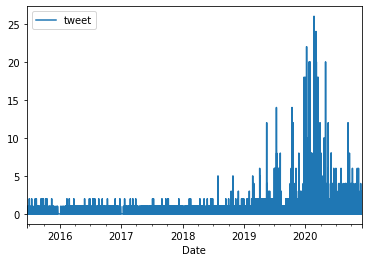

In [116]:
tweets['Date'] = pd.to_datetime(tweets['Date'])
# plot a time series
(tweets[['Date','tweet']]
 .set_index('Date')
 # 'T' = minute
 .resample('T')
 .count()
 .rename(columns=dict(text='1-minute counts'))
 .plot()
 
);


In [117]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    kmeans.fit(countVector)
    wcss.append(kmeans.inertia_)


Initialization complete
Iteration 0, inertia 264320.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 251966.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 327732.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 387636.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 220436.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 218556.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 204346.0
Iteration 1, inertia 159095.10725607743
Converged at iteration 1: strict convergence.
Initialization compl

Initialization complete
Iteration 0, inertia 220329.0
Iteration 1, inertia 159006.0209636217
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 218372.0
Iteration 1, inertia 158623.59129084783
Iteration 2, inertia 157713.87210740164
Iteration 3, inertia 157319.06115602082
Iteration 4, inertia 156722.63707508967
Iteration 5, inertia 156567.16587762238
Iteration 6, inertia 156565.73361653488
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 202948.0
Iteration 1, inertia 157438.07688263946
Iteration 2, inertia 156933.03440665163
Iteration 3, inertia 156203.9479435026
Iteration 4, inertia 156167.07176574026
Iteration 5, inertia 156164.81953024206
Iteration 6, inertia 156164.35212123656
Iteration 7, inertia 156164.17191305928
Iteration 8, inertia 156163.91874405084
Iteration 9, inertia 156163.6554911787
Iteration 10, inertia 156163.37633462987
Iteration 11, inertia 156163.1186030368
Converged at iteration 11: s

Iteration 0, inertia 197593.0
Iteration 1, inertia 158536.43781162347
Iteration 2, inertia 157157.18324294177
Iteration 3, inertia 155984.72427311089
Iteration 4, inertia 155822.2390535136
Iteration 5, inertia 155618.86803671613
Iteration 6, inertia 155355.61952389407
Iteration 7, inertia 155097.0180898942
Iteration 8, inertia 154725.18745517667
Iteration 9, inertia 153643.94310064754
Iteration 10, inertia 153360.04471423948
Iteration 11, inertia 153354.602953792
Iteration 12, inertia 153353.94580982288
Iteration 13, inertia 153350.65468577732
Iteration 14, inertia 153316.50053014766
Iteration 15, inertia 153296.11206926015
Iteration 16, inertia 153295.99158554408
Iteration 17, inertia 153295.94864232145
Iteration 18, inertia 153295.78664705213
Iteration 19, inertia 153295.76172711726
Iteration 20, inertia 153295.7437777496
Iteration 21, inertia 153295.73100295084
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 222671.0
Iteration 1, inertia 1

Iteration 1, inertia 155415.82161527526
Iteration 2, inertia 155325.38085032432
Iteration 3, inertia 154994.76169953693
Iteration 4, inertia 154931.43216602912
Iteration 5, inertia 154912.0013764194
Iteration 6, inertia 154910.07904283438
Iteration 7, inertia 154909.52254302826
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 219711.0
Iteration 1, inertia 157492.37207627317
Iteration 2, inertia 156305.681822496
Iteration 3, inertia 155735.93618715182
Iteration 4, inertia 155367.21623087447
Iteration 5, inertia 155110.30743069222
Iteration 6, inertia 154420.29941654895
Iteration 7, inertia 153571.96730167198
Iteration 8, inertia 153558.8816765951
Iteration 9, inertia 153558.23769700967
Iteration 10, inertia 153557.83532232727
Iteration 11, inertia 153553.50512419196
Iteration 12, inertia 153515.0135275096
Iteration 13, inertia 153501.50863021318
Iteration 14, inertia 153501.3605982671
Iteration 15, inertia 153501.19248583508
Iteration 16, inerti

Iteration 8, inertia 153018.1934169178
Iteration 9, inertia 153010.37074053992
Iteration 10, inertia 153009.66068229877
Iteration 11, inertia 153009.4533370472
Iteration 12, inertia 153008.81328049177
Iteration 13, inertia 153002.6017084064
Iteration 14, inertia 152963.81151811316
Iteration 15, inertia 152950.41296514228
Iteration 16, inertia 152950.15793622797
Iteration 17, inertia 152949.99338938482
Iteration 18, inertia 152949.9434965174
Iteration 19, inertia 152949.93064118316
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 209780.0
Iteration 1, inertia 154544.29819562688
Iteration 2, inertia 153651.80756472782
Iteration 3, inertia 153147.16632994596
Iteration 4, inertia 153091.37555836234
Iteration 5, inertia 153089.57085241613
Iteration 6, inertia 153088.35394715113
Iteration 7, inertia 153086.9629140333
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 202590.0
Iteration 1, inertia 156673.140596

Iteration 12, inertia 154437.73809156282
Iteration 13, inertia 154396.33448395765
Iteration 14, inertia 154344.4931997689
Iteration 15, inertia 154291.24247057902
Iteration 16, inertia 154239.51093815351
Iteration 17, inertia 154200.25114767387
Iteration 18, inertia 154162.92638105171
Iteration 19, inertia 154117.9315232957
Iteration 20, inertia 154062.98961910722
Iteration 21, inertia 154013.7606508783
Iteration 22, inertia 153981.79920364992
Iteration 23, inertia 153960.69765382682
Iteration 24, inertia 153952.1488745268
Iteration 25, inertia 153947.71783314203
Iteration 26, inertia 153945.32956612177
Iteration 27, inertia 153943.64960466523
Iteration 28, inertia 153943.36496033098
Iteration 29, inertia 153943.22865405527
Iteration 30, inertia 153943.11557203115
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 194988.0
Iteration 1, inertia 155920.37421272355
Iteration 2, inertia 154569.74410719587
Iteration 3, inertia 153648.34659607583
Iter

Iteration 12, inertia 154103.54153164683
Iteration 13, inertia 153999.9647496929
Iteration 14, inertia 153852.93288416867
Iteration 15, inertia 153743.45014451732
Iteration 16, inertia 153705.21888913808
Iteration 17, inertia 153695.0306901533
Iteration 18, inertia 153689.79142310694
Iteration 19, inertia 153685.10304699285
Iteration 20, inertia 153681.78711151273
Iteration 21, inertia 153680.11685578187
Iteration 22, inertia 153678.47606422627
Iteration 23, inertia 153677.48247131516
Iteration 24, inertia 153675.26787143832
Iteration 25, inertia 153670.6599085753
Iteration 26, inertia 153666.34196430646
Iteration 27, inertia 153662.26697519262
Iteration 28, inertia 153658.18124615226
Iteration 29, inertia 153655.73646842167
Iteration 30, inertia 153653.07625813328
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 194950.0
Iteration 1, inertia 155871.66802256834
Iteration 2, inertia 154515.4543484639
Iteration 3, inertia 153597.13892855353
Iter

Iteration 2, inertia 154283.7701837475
Iteration 3, inertia 153855.17006526692
Iteration 4, inertia 153553.2258250109
Iteration 5, inertia 153290.81915515856
Iteration 6, inertia 152644.2183424082
Iteration 7, inertia 152491.03069719498
Iteration 8, inertia 152471.58873086836
Iteration 9, inertia 152466.24721602368
Iteration 10, inertia 152461.83859019587
Iteration 11, inertia 152443.958452307
Iteration 12, inertia 152387.7353023156
Iteration 13, inertia 152339.1749483773
Iteration 14, inertia 152257.6203534426
Iteration 15, inertia 152132.03473261147
Iteration 16, inertia 152015.6466648701
Iteration 17, inertia 151964.57627668223
Iteration 18, inertia 151947.29359956874
Iteration 19, inertia 151940.2791440022
Iteration 20, inertia 151937.92840528573
Iteration 21, inertia 151936.37900041218
Iteration 22, inertia 151935.2983862148
Iteration 23, inertia 151934.4056634548
Iteration 24, inertia 151933.54110984752
Iteration 25, inertia 151931.9841251896
Iteration 26, inertia 151929.77093971

Iteration 10, inertia 151899.5340254996
Iteration 11, inertia 151895.15880459832
Iteration 12, inertia 151891.40290831856
Iteration 13, inertia 151886.0711220832
Iteration 14, inertia 151879.49640463397
Iteration 15, inertia 151872.62468635823
Iteration 16, inertia 151865.34142323546
Iteration 17, inertia 151851.45229368593
Iteration 18, inertia 151826.0087696629
Iteration 19, inertia 151722.89742490673
Iteration 20, inertia 151160.93099936348
Iteration 21, inertia 150621.12834480644
Iteration 22, inertia 150358.6671291365
Iteration 23, inertia 150356.2300744438
Converged at iteration 23: strict convergence.
Initialization complete
Iteration 0, inertia 185743.0
Iteration 1, inertia 154746.01140442697
Iteration 2, inertia 154215.5670401181
Iteration 3, inertia 153786.9297195707
Iteration 4, inertia 153484.98698603356
Iteration 5, inertia 153222.6091601697
Iteration 6, inertia 152576.04568930808
Iteration 7, inertia 152422.84504561356
Iteration 8, inertia 152403.39928075272
Iteration 9, 

Iteration 7, inertia 152631.99377249775
Iteration 8, inertia 152580.1104927243
Iteration 9, inertia 152507.80175648842
Iteration 10, inertia 152258.0190493162
Iteration 11, inertia 151603.43207654194
Iteration 12, inertia 151340.34044313582
Iteration 13, inertia 150934.53353000595
Iteration 14, inertia 150801.55482308104
Iteration 15, inertia 150731.24357232297
Iteration 16, inertia 150698.5411363659
Iteration 17, inertia 150687.6983892448
Iteration 18, inertia 150684.72685661333
Iteration 19, inertia 150683.83912907494
Iteration 20, inertia 150683.34497262363
Iteration 21, inertia 150683.22139230138
Iteration 22, inertia 150683.20415060438
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 182750.0
Iteration 1, inertia 156142.1218997065
Iteration 2, inertia 154239.87859418767
Iteration 3, inertia 153597.31835409757
Iteration 4, inertia 152765.2564705407
Iteration 5, inertia 151645.8358654488
Iteration 6, inertia 151419.06170972023
Iteration 7, 

Iteration 25, inertia 149877.23611221788
Iteration 26, inertia 149872.82236977902
Iteration 27, inertia 149870.0517363857
Iteration 28, inertia 149867.18817509318
Iteration 29, inertia 149863.45410777192
Iteration 30, inertia 149859.28073003722
Iteration 31, inertia 149853.73772922237
Iteration 32, inertia 149849.88533545975
Iteration 33, inertia 149844.3635563701
Iteration 34, inertia 149839.68088866
Iteration 35, inertia 149837.06989823893
Iteration 36, inertia 149834.34026128252
Iteration 37, inertia 149831.46488115023
Iteration 38, inertia 149826.88951181577
Iteration 39, inertia 149825.22293821163
Iteration 40, inertia 149823.9541713127
Iteration 41, inertia 149823.9466192731
Converged at iteration 41: strict convergence.
Initialization complete
Iteration 0, inertia 172850.0
Iteration 1, inertia 157000.5941658465
Iteration 2, inertia 155717.62971614528
Iteration 3, inertia 154801.62500777908
Iteration 4, inertia 154015.4611290017
Iteration 5, inertia 152833.3512434523
Iteration 6,

Iteration 27, inertia 151720.53304850208
Iteration 28, inertia 151679.06803820914
Iteration 29, inertia 151676.30439133788
Iteration 30, inertia 151675.82972700096
Iteration 31, inertia 151675.54873906763
Iteration 32, inertia 151675.49802838924
Converged at iteration 32: strict convergence.
Initialization complete
Iteration 0, inertia 179668.0
Iteration 1, inertia 154671.23708951098
Iteration 2, inertia 154624.38281061058
Iteration 3, inertia 154604.2411242642
Iteration 4, inertia 154575.81552378615
Iteration 5, inertia 154526.5121386935
Iteration 6, inertia 154485.88285768894
Iteration 7, inertia 154451.75874418148
Iteration 8, inertia 154403.8086032831
Iteration 9, inertia 154327.60336972852
Iteration 10, inertia 154242.1827905475
Iteration 11, inertia 154168.59315406063
Iteration 12, inertia 154106.41285925033
Iteration 13, inertia 154035.28656328827
Iteration 14, inertia 153961.54989603435
Iteration 15, inertia 153879.42348300526
Iteration 16, inertia 153814.502135702
Iteration 17

Iteration 8, inertia 152151.5303520889
Iteration 9, inertia 152081.68997978084
Iteration 10, inertia 152045.1470178253
Iteration 11, inertia 152032.57858508066
Iteration 12, inertia 152027.84383092503
Iteration 13, inertia 152026.19930716636
Iteration 14, inertia 152025.43993125568
Iteration 15, inertia 152025.22704759234
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 174417.0
Iteration 1, inertia 156538.86435868035
Iteration 2, inertia 154467.75358942014
Iteration 3, inertia 153770.52930735808
Iteration 4, inertia 153275.1429943529
Iteration 5, inertia 152917.77293989324
Iteration 6, inertia 152134.58637233227
Iteration 7, inertia 151976.77850681325
Iteration 8, inertia 151971.12849057064
Iteration 9, inertia 151970.97442141132
Iteration 10, inertia 151970.96529271867
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 162131.0
Iteration 1, inertia 156584.09543382504
Iteration 2, inertia 156297.278553

Initialization complete
Iteration 0, inertia 200321.0
Iteration 1, inertia 154704.25563635555
Iteration 2, inertia 152851.6328074995
Iteration 3, inertia 150808.0485969716
Iteration 4, inertia 150133.97904846555
Iteration 5, inertia 150025.3515852321
Iteration 6, inertia 149947.57882577702
Iteration 7, inertia 149805.44631785518
Iteration 8, inertia 149218.03587666812
Iteration 9, inertia 148883.49446120372
Iteration 10, inertia 148871.8117345569
Iteration 11, inertia 148813.03925364296
Iteration 12, inertia 148737.30521016518
Iteration 13, inertia 148694.1529873448
Iteration 14, inertia 148680.75831372075
Iteration 15, inertia 148674.89350844827
Iteration 16, inertia 148673.23104297533
Iteration 17, inertia 148672.15499848063
Iteration 18, inertia 148671.66325837333
Iteration 19, inertia 148671.4156909099
Iteration 20, inertia 148670.8059999107
Iteration 21, inertia 148670.49048386532
Iteration 22, inertia 148670.2606798353
Converged at iteration 22: strict convergence.
Initialization

Initialization complete
Iteration 0, inertia 174369.0
Iteration 1, inertia 154392.81615455012
Iteration 2, inertia 153181.30693215775
Iteration 3, inertia 152092.95871481736
Iteration 4, inertia 151295.77814734224
Iteration 5, inertia 150986.10658960624
Iteration 6, inertia 150582.59776371796
Iteration 7, inertia 150235.10496274446
Iteration 8, inertia 150210.66707935452
Iteration 9, inertia 150185.4369092501
Iteration 10, inertia 150170.29419481943
Iteration 11, inertia 150161.70652983652
Iteration 12, inertia 150158.7477598133
Iteration 13, inertia 150157.29209779543
Iteration 14, inertia 150154.99022842327
Iteration 15, inertia 150154.15403128797
Iteration 16, inertia 150153.4503245807
Iteration 17, inertia 150152.84992670154
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 194201.0
Iteration 1, inertia 155153.7825545582
Iteration 2, inertia 153800.94172923133
Iteration 3, inertia 152761.5619836775
Iteration 4, inertia 151899.48958226474
It

Iteration 7, inertia 150971.18986384134
Iteration 8, inertia 150885.07542659566
Iteration 9, inertia 150549.46165113445
Iteration 10, inertia 149684.9409520165
Iteration 11, inertia 149567.22324865608
Iteration 12, inertia 149495.48416278634
Iteration 13, inertia 149400.35702837826
Iteration 14, inertia 149337.1538352153
Iteration 15, inertia 149307.53119046657
Iteration 16, inertia 149290.2528699118
Iteration 17, inertia 149282.37932270422
Iteration 18, inertia 149278.35463806964
Iteration 19, inertia 149276.19505390423
Iteration 20, inertia 149274.70010701835
Iteration 21, inertia 149273.78928211596
Iteration 22, inertia 149273.29654517694
Iteration 23, inertia 149272.9744289101
Iteration 24, inertia 149272.9569866439
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 182352.0
Iteration 1, inertia 155708.6253150951
Iteration 2, inertia 153803.33541217464
Iteration 3, inertia 153165.7955092221
Iteration 4, inertia 152292.8759864056
Iteration 5,

Iteration 20, inertia 152134.57477097586
Iteration 21, inertia 152133.79497483477
Iteration 22, inertia 152132.65237450806
Iteration 23, inertia 152132.4261962225
Iteration 24, inertia 152132.23346332164
Iteration 25, inertia 152132.13124398873
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inertia 182161.0
Iteration 1, inertia 154696.88197243554
Iteration 2, inertia 153144.21061518523
Iteration 3, inertia 152128.86455120117
Iteration 4, inertia 151340.54258209004
Iteration 5, inertia 151209.3346630774
Iteration 6, inertia 151167.25420605246
Iteration 7, inertia 151121.18620493353
Iteration 8, inertia 151081.10584840566
Iteration 9, inertia 151048.3122406804
Iteration 10, inertia 151008.56238262908
Iteration 11, inertia 150924.03528642442
Iteration 12, inertia 150650.54065948405
Iteration 13, inertia 149832.28692841175
Iteration 14, inertia 149310.92735959662
Iteration 15, inertia 149242.53616850762
Iteration 16, inertia 149218.19361487243
Iteration

Iteration 2, inertia 153802.3467119187
Iteration 3, inertia 152956.9666414001
Iteration 4, inertia 152444.3031418535
Iteration 5, inertia 152025.53341880284
Iteration 6, inertia 151494.06457356008
Iteration 7, inertia 150691.9202939722
Iteration 8, inertia 150405.77490519383
Iteration 9, inertia 149361.28351495508
Iteration 10, inertia 149104.5205571515
Iteration 11, inertia 149079.33935259387
Iteration 12, inertia 149051.37327260387
Iteration 13, inertia 149025.07386703958
Iteration 14, inertia 148999.52641383425
Iteration 15, inertia 148975.5412045694
Iteration 16, inertia 148952.7717007758
Iteration 17, inertia 148937.772444089
Iteration 18, inertia 148929.68258596928
Iteration 19, inertia 148924.1602768792
Iteration 20, inertia 148920.44442541117
Iteration 21, inertia 148912.06799089914
Iteration 22, inertia 148909.4713631767
Iteration 23, inertia 148906.91062548474
Iteration 24, inertia 148905.56584063638
Iteration 25, inertia 148903.36782113797
Iteration 26, inertia 148901.587400

Initialization complete
Iteration 0, inertia 194065.0
Iteration 1, inertia 155038.38742910078
Iteration 2, inertia 153682.19537448668
Iteration 3, inertia 152612.66307036005
Iteration 4, inertia 151781.74481381496
Iteration 5, inertia 150995.58853044154
Iteration 6, inertia 150739.36339195477
Iteration 7, inertia 150663.37905126435
Iteration 8, inertia 150657.5867353869
Iteration 9, inertia 150652.6460354637
Iteration 10, inertia 150652.19697160905
Iteration 11, inertia 150652.15555608098
Iteration 12, inertia 150652.08588403836
Iteration 13, inertia 150652.04604728924
Iteration 14, inertia 150651.77339802386
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 188703.0
Iteration 1, inertia 151648.22606368037
Iteration 2, inertia 150727.0561270578
Iteration 3, inertia 149604.344319477
Iteration 4, inertia 148781.72720393055
Iteration 5, inertia 148360.81109615118
Iteration 6, inertia 148123.74592293976
Iteration 7, inertia 148097.27899183298
Itera

Iteration 36, inertia 148721.35484455348
Iteration 37, inertia 148719.62985666757
Iteration 38, inertia 148717.8948234867
Iteration 39, inertia 148714.13494611983
Iteration 40, inertia 148710.7652711134
Iteration 41, inertia 148708.47815445412
Iteration 42, inertia 148705.49697699797
Iteration 43, inertia 148701.5574152982
Iteration 44, inertia 148697.14701272815
Iteration 45, inertia 148694.02464953696
Iteration 46, inertia 148690.8642313953
Iteration 47, inertia 148686.08975268085
Iteration 48, inertia 148680.36702546504
Iteration 49, inertia 148678.30011388983
Iteration 50, inertia 148677.32129563348
Iteration 51, inertia 148676.70543377206
Iteration 52, inertia 148676.34620104107
Converged at iteration 52: strict convergence.
Initialization complete
Iteration 0, inertia 172293.0
Iteration 1, inertia 156130.72917049736
Iteration 2, inertia 153953.196936656
Iteration 3, inertia 152672.03050238796
Iteration 4, inertia 151915.79404259525
Iteration 5, inertia 150867.21895993006
Iteratio

Iteration 29, inertia 150385.48265321512
Iteration 30, inertia 150376.566320517
Iteration 31, inertia 150368.5501205827
Iteration 32, inertia 150363.35309159174
Iteration 33, inertia 150358.96897114316
Iteration 34, inertia 150354.5105342012
Iteration 35, inertia 150348.28757764958
Iteration 36, inertia 150337.00446370814
Iteration 37, inertia 150324.72338429608
Iteration 38, inertia 150311.83152283513
Iteration 39, inertia 150303.49007973037
Iteration 40, inertia 150300.48362545017
Iteration 41, inertia 150299.91264777645
Iteration 42, inertia 150299.30833934277
Iteration 43, inertia 150298.2799752715
Iteration 44, inertia 150297.2687382015
Iteration 45, inertia 150296.8260432354
Iteration 46, inertia 150296.70185884487
Iteration 47, inertia 150296.3936099881
Iteration 48, inertia 150296.10738131523
Converged at iteration 48: strict convergence.
Initialization complete
Iteration 0, inertia 172512.0
Iteration 1, inertia 155525.5580546382
Iteration 2, inertia 153875.4899963133
Iteration

Iteration 8, inertia 146460.43289239012
Iteration 9, inertia 146433.16593103285
Iteration 10, inertia 146407.39526701177
Iteration 11, inertia 146390.51183408868
Iteration 12, inertia 146384.10915839687
Iteration 13, inertia 146378.47567233918
Iteration 14, inertia 146375.4672702793
Iteration 15, inertia 146372.60011607577
Iteration 16, inertia 146372.04119324038
Iteration 17, inertia 146371.32415221373
Iteration 18, inertia 146370.44250722972
Iteration 19, inertia 146369.76416414918
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 181476.0
Iteration 1, inertia 152358.42075731623
Iteration 2, inertia 150083.67900931416
Iteration 3, inertia 148249.93346267202
Iteration 4, inertia 147776.63892805963
Iteration 5, inertia 147501.252616948
Iteration 6, inertia 147441.81753596826
Iteration 7, inertia 147414.1400166696
Iteration 8, inertia 147353.33356079893
Iteration 9, inertia 147076.61282252718
Iteration 10, inertia 146822.65182630593
Iteration 11

Iteration 21, inertia 150016.0309689461
Iteration 22, inertia 150014.23503173012
Iteration 23, inertia 150013.46477819394
Iteration 24, inertia 150011.41741962443
Iteration 25, inertia 150009.2550370043
Iteration 26, inertia 150008.53637123117
Iteration 27, inertia 150008.1262598158
Iteration 28, inertia 150007.83910121687
Converged at iteration 28: strict convergence.
Initialization complete
Iteration 0, inertia 172128.0
Iteration 1, inertia 154613.57229733164
Iteration 2, inertia 153535.16524178867
Iteration 3, inertia 152771.58830440798
Iteration 4, inertia 152547.00074561717
Iteration 5, inertia 152204.5152294005
Iteration 6, inertia 151039.3681149382
Iteration 7, inertia 150460.11225197272
Iteration 8, inertia 150400.63489081405
Iteration 9, inertia 150342.31266878385
Iteration 10, inertia 150300.06917339374
Iteration 11, inertia 150251.19480442873
Iteration 12, inertia 150158.11904562428
Iteration 13, inertia 150047.96066479635
Iteration 14, inertia 149960.0452723111
Iteration 15

Iteration 18, inertia 148389.806365058
Iteration 19, inertia 148389.04908029744
Iteration 20, inertia 148388.46311199773
Iteration 21, inertia 148388.02321793814
Iteration 22, inertia 148387.61401218027
Iteration 23, inertia 148387.51973510842
Iteration 24, inertia 148386.99046004243
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 172111.0
Iteration 1, inertia 155771.25040546723
Iteration 2, inertia 154459.78532575723
Iteration 3, inertia 153017.59142954598
Iteration 4, inertia 152018.2714704286
Iteration 5, inertia 151811.88360742995
Iteration 6, inertia 151632.48584008453
Iteration 7, inertia 151518.18137065478
Iteration 8, inertia 151459.54600609292
Iteration 9, inertia 151414.6856286723
Iteration 10, inertia 151364.5167366941
Iteration 11, inertia 151246.3128037051
Iteration 12, inertia 150656.31975011597
Iteration 13, inertia 149978.7814234839
Iteration 14, inertia 149604.51637785445
Iteration 15, inertia 149447.1658504892
Iteration 16, 

Iteration 11, inertia 148314.34003912495
Iteration 12, inertia 148313.73062205
Iteration 13, inertia 148313.6661946567
Iteration 14, inertia 148313.63175821514
Iteration 15, inertia 148313.61919933948
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 171700.0
Iteration 1, inertia 154452.42193426247
Iteration 2, inertia 154035.8896052189
Iteration 3, inertia 153933.7774890004
Iteration 4, inertia 153547.1528741746
Iteration 5, inertia 153001.25213187555
Iteration 6, inertia 152455.34632739812
Iteration 7, inertia 151930.58972042456
Iteration 8, inertia 151073.1759447681
Iteration 9, inertia 150874.80885659298
Iteration 10, inertia 150848.0796832073
Iteration 11, inertia 150827.47666432042
Iteration 12, inertia 150797.62356461893
Iteration 13, inertia 150756.2976878055
Iteration 14, inertia 150661.7992401717
Iteration 15, inertia 150250.832005581
Iteration 16, inertia 149754.41416441218
Iteration 17, inertia 149429.83643502244
Iteration 18, inert

Iteration 10, inertia 148414.45665114283
Iteration 11, inertia 148378.5655572322
Iteration 12, inertia 148323.03091496718
Iteration 13, inertia 148270.2551274642
Iteration 14, inertia 148261.08789961136
Iteration 15, inertia 148259.04969015074
Iteration 16, inertia 148256.22327210987
Iteration 17, inertia 148250.5947523019
Iteration 18, inertia 148218.70381963302
Iteration 19, inertia 148082.13861024656
Iteration 20, inertia 147348.13170211602
Iteration 21, inertia 147319.4690187194
Iteration 22, inertia 147310.5427844435
Iteration 23, inertia 147307.56825868966
Iteration 24, inertia 147306.67769599755
Iteration 25, inertia 147306.13912982895
Iteration 26, inertia 147305.19182542246
Iteration 27, inertia 147305.05335291146
Iteration 28, inertia 147304.9286128611
Iteration 29, inertia 147304.76014140798
Converged at iteration 29: strict convergence.
Initialization complete
Iteration 0, inertia 181250.0
Iteration 1, inertia 152002.81029131176
Iteration 2, inertia 149667.5446262893
Iterat

Initialization complete
Iteration 0, inertia 171152.0
Iteration 1, inertia 151958.47201473845
Iteration 2, inertia 150941.64892370347
Iteration 3, inertia 150713.05037154502
Iteration 4, inertia 150569.08451614628
Iteration 5, inertia 150529.16006501808
Iteration 6, inertia 150472.0508740787
Iteration 7, inertia 150402.41399868854
Iteration 8, inertia 150367.9392492985
Iteration 9, inertia 150342.42548972057
Iteration 10, inertia 150260.107749137
Iteration 11, inertia 150206.20088659294
Iteration 12, inertia 150196.80817701705
Iteration 13, inertia 150190.7991729239
Iteration 14, inertia 150184.02215783612
Iteration 15, inertia 150178.80637333315
Iteration 16, inertia 150170.2585380659
Iteration 17, inertia 150162.4015701443
Iteration 18, inertia 150158.7489258588
Iteration 19, inertia 150155.0035100145
Iteration 20, inertia 150149.7044997458
Iteration 21, inertia 150145.0617283113
Iteration 22, inertia 150140.35362752093
Iteration 23, inertia 150136.34017900412
Iteration 24, inertia 1

Iteration 11, inertia 150729.888145469
Iteration 12, inertia 150701.12247848418
Iteration 13, inertia 150661.14206024515
Iteration 14, inertia 150572.0103351125
Iteration 15, inertia 150183.92890492507
Iteration 16, inertia 149669.27550663718
Iteration 17, inertia 149332.8659489059
Iteration 18, inertia 149332.55240394833
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 171286.0
Iteration 1, inertia 154096.85320579904
Iteration 2, inertia 153084.3202892737
Iteration 3, inertia 151868.505440637
Iteration 4, inertia 150717.61079564109
Iteration 5, inertia 149025.76672394443
Iteration 6, inertia 148595.21118706113
Iteration 7, inertia 148351.13657148468
Iteration 8, inertia 148334.07482183893
Iteration 9, inertia 148292.85696800877
Iteration 10, inertia 148243.6470573918
Iteration 11, inertia 148179.22614060488
Iteration 12, inertia 148124.596531032
Iteration 13, inertia 148108.69518626644
Iteration 14, inertia 148099.78693479765
Iteration 15, in

Iteration 26, inertia 148487.79911500926
Iteration 27, inertia 148478.28699588025
Iteration 28, inertia 148473.48429216538
Iteration 29, inertia 148468.41799660033
Iteration 30, inertia 148458.21474316213
Iteration 31, inertia 148442.92071787556
Iteration 32, inertia 148416.25104125406
Iteration 33, inertia 148390.3720134186
Iteration 34, inertia 148360.20806021246
Iteration 35, inertia 148343.8965947601
Iteration 36, inertia 148335.12506437174
Iteration 37, inertia 148329.96693642988
Iteration 38, inertia 148322.0989279132
Iteration 39, inertia 148317.8826953908
Iteration 40, inertia 148314.35047054125
Iteration 41, inertia 148312.6616850731
Iteration 42, inertia 148310.42025627676
Iteration 43, inertia 148309.59538300504
Iteration 44, inertia 148309.2985457243
Iteration 45, inertia 148308.88993443226
Converged at iteration 45: strict convergence.
Initialization complete
Iteration 0, inertia 181634.0
Iteration 1, inertia 152890.90280348482
Iteration 2, inertia 151231.04275231058
Itera

Iteration 31, inertia 149119.48147274242
Iteration 32, inertia 149114.48840196687
Iteration 33, inertia 149112.7213933156
Iteration 34, inertia 149110.45697089692
Iteration 35, inertia 149108.47128294897
Iteration 36, inertia 149106.38126185676
Iteration 37, inertia 149105.54450768343
Iteration 38, inertia 149105.05745784618
Iteration 39, inertia 149104.87947539112
Iteration 40, inertia 149104.70310917575
Iteration 41, inertia 149104.6427809001
Converged at iteration 41: strict convergence.
Initialization complete
Iteration 0, inertia 171053.0
Iteration 1, inertia 151867.04154393452
Iteration 2, inertia 150850.0735807587
Iteration 3, inertia 150621.40032461938
Iteration 4, inertia 150477.40009684046
Iteration 5, inertia 150437.46485693761
Iteration 6, inertia 150379.40482248837
Iteration 7, inertia 150309.87243900588
Iteration 8, inertia 150276.19454705674
Iteration 9, inertia 150250.69407264524
Iteration 10, inertia 150168.40670338873
Iteration 11, inertia 150114.45076306566
Iteration

Iteration 10, inertia 148128.92243886858
Iteration 11, inertia 148061.508804013
Iteration 12, inertia 148060.89972577774
Iteration 13, inertia 148060.835473437
Iteration 14, inertia 148060.8011906874
Iteration 15, inertia 148060.78863010174
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 171459.0
Iteration 1, inertia 154226.77551790295
Iteration 2, inertia 153819.28932727058
Iteration 3, inertia 153716.92861591693
Iteration 4, inertia 153335.63648045127
Iteration 5, inertia 152792.03381874593
Iteration 6, inertia 152237.66629185207
Iteration 7, inertia 151712.58302102046
Iteration 8, inertia 150854.0256892981
Iteration 9, inertia 150654.679946378
Iteration 10, inertia 150628.5824332831
Iteration 11, inertia 150604.41351662387
Iteration 12, inertia 150571.37084641372
Iteration 13, inertia 150519.20445976476
Iteration 14, inertia 150346.3519284367
Iteration 15, inertia 149748.63914165393
Iteration 16, inertia 149274.2395765921
Iteration 17, ine

Iteration 1, inertia 151974.87608261217
Iteration 2, inertia 149671.75232649693
Iteration 3, inertia 148254.17492452465
Iteration 4, inertia 147637.52347559392
Iteration 5, inertia 147280.81137183018
Iteration 6, inertia 147067.6622923577
Iteration 7, inertia 146998.05796092088
Iteration 8, inertia 146969.90416295975
Iteration 9, inertia 146956.05300187395
Iteration 10, inertia 146945.7264777323
Iteration 11, inertia 146916.1422819821
Iteration 12, inertia 146868.2288148264
Iteration 13, inertia 146815.16308731007
Iteration 14, inertia 146804.1297798645
Iteration 15, inertia 146800.05906202394
Iteration 16, inertia 146797.446836239
Iteration 17, inertia 146793.62079899537
Iteration 18, inertia 146780.16078577272
Iteration 19, inertia 146717.51174605073
Iteration 20, inertia 146312.4342979737
Iteration 21, inertia 145883.32091335885
Iteration 22, inertia 145867.19975193
Iteration 23, inertia 145860.62992282643
Iteration 24, inertia 145856.5225817984
Iteration 25, inertia 145856.25963722

Iteration 8, inertia 150167.9900514461
Iteration 9, inertia 150142.44517318823
Iteration 10, inertia 150059.44742198344
Iteration 11, inertia 150006.07206369026
Iteration 12, inertia 149996.672144126
Iteration 13, inertia 149990.65646704962
Iteration 14, inertia 149983.87617954207
Iteration 15, inertia 149978.67904330944
Iteration 16, inertia 149970.13434009923
Iteration 17, inertia 149962.23775145583
Iteration 18, inertia 149958.5968844476
Iteration 19, inertia 149955.54137542404
Iteration 20, inertia 149950.23981004005
Iteration 21, inertia 149945.5991996841
Iteration 22, inertia 149940.93341433164
Iteration 23, inertia 149936.9475947862
Iteration 24, inertia 149932.6678410816
Iteration 25, inertia 149925.04797899464
Iteration 26, inertia 149916.2992152873
Iteration 27, inertia 149900.59449950623
Iteration 28, inertia 149878.9352658787
Iteration 29, inertia 149842.66608386757
Iteration 30, inertia 149781.5842791489
Iteration 31, inertia 149741.95694477853
Iteration 32, inertia 149720

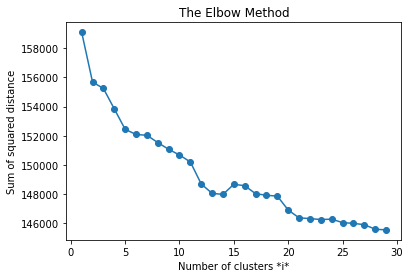

In [118]:
#elbow method
plt.plot(range(1,30),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel(r'Number of clusters *i*')
plt.ylabel('Sum of squared distance');
plt.savefig('elbow.png')
plt.show()

In [119]:
from sklearn.metrics import silhouette_score
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=300,n_init=10,random_state=0,verbose=True)
    kmeans.fit(countVector)
    score = silhouette_score(countVector, kmeans.labels_)
    silhouette_coefficients.append(score)

Initialization complete
Iteration 0, inertia 220481.0
Iteration 1, inertia 158849.13332275453
Iteration 2, inertia 158457.76034072845
Iteration 3, inertia 158089.23411864083
Iteration 4, inertia 157827.76810048244
Iteration 5, inertia 157612.66500819338
Iteration 6, inertia 157512.60449760928
Iteration 7, inertia 157413.2450669802
Iteration 8, inertia 157191.65661286187
Iteration 9, inertia 156348.3399363491
Iteration 10, inertia 155754.85245924394
Iteration 11, inertia 155725.94086429477
Iteration 12, inertia 155725.57359343904
Iteration 13, inertia 155725.3831636426
Iteration 14, inertia 155724.98477577636
Iteration 15, inertia 155720.52912376827
Iteration 16, inertia 155691.14270083373
Iteration 17, inertia 155679.31171414006
Iteration 18, inertia 155679.25558046944
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 251206.0
Iteration 1, inertia 158589.56049332337
Iteration 2, inertia 157853.93338462236
Iteration 3, inertia 156697.45755058146

Iteration 2, inertia 158587.87802883092
Iteration 3, inertia 158378.19749064662
Iteration 4, inertia 158359.72036639156
Iteration 5, inertia 158284.7945393457
Iteration 6, inertia 158029.04645270947
Iteration 7, inertia 157923.1151970552
Iteration 8, inertia 157902.9785690896
Iteration 9, inertia 157881.338979478
Iteration 10, inertia 157849.7235811622
Iteration 11, inertia 157792.70589457036
Iteration 12, inertia 157673.75319128597
Iteration 13, inertia 157532.95448341835
Iteration 14, inertia 157452.66489982998
Iteration 15, inertia 157363.26187245516
Iteration 16, inertia 157217.15573602502
Iteration 17, inertia 156690.14272788237
Iteration 18, inertia 156010.65373796425
Iteration 19, inertia 155641.94072548457
Iteration 20, inertia 155640.63563166864
Iteration 21, inertia 155640.40334050267
Iteration 22, inertia 155639.97098290673
Iteration 23, inertia 155635.34441598615
Iteration 24, inertia 155605.8912025271
Iteration 25, inertia 155594.0486700064
Iteration 26, inertia 155593.992

Iteration 0, inertia 222671.0
Iteration 1, inertia 155006.2779505962
Iteration 2, inertia 153843.20740287134
Iteration 3, inertia 152819.732686886
Iteration 4, inertia 152476.17623949065
Iteration 5, inertia 152464.2454325879
Iteration 6, inertia 152441.6819004314
Iteration 7, inertia 152441.01850321886
Iteration 8, inertia 152440.84806836813
Iteration 9, inertia 152440.83826718508
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 191492.0
Iteration 1, inertia 155550.20186694837
Iteration 2, inertia 155489.17438051177
Iteration 3, inertia 155451.87177066965
Iteration 4, inertia 155439.00526341086
Iteration 5, inertia 155430.4272197224
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 219949.0
Iteration 1, inertia 158520.52642948966
Iteration 2, inertia 157721.80017385076
Iteration 3, inertia 157217.05820898307
Iteration 4, inertia 156878.67352598556
Iteration 5, inertia 156685.7626044928
Iteration 6, iner

Iteration 0, inertia 210010.0
Iteration 1, inertia 155045.4661272076
Iteration 2, inertia 154163.99566028206
Iteration 3, inertia 153656.04368218413
Iteration 4, inertia 153607.5097984944
Iteration 5, inertia 153605.88613320226
Iteration 6, inertia 153604.66494853553
Iteration 7, inertia 153603.41829113427
Iteration 8, inertia 153602.2482410714
Iteration 9, inertia 153599.99680456784
Iteration 10, inertia 153599.36096366614
Iteration 11, inertia 153598.3791685123
Iteration 12, inertia 153597.25959575817
Iteration 13, inertia 153596.18437368877
Iteration 14, inertia 153590.19064230114
Iteration 15, inertia 153564.07601024624
Iteration 16, inertia 153476.99757222668
Iteration 17, inertia 153358.77315946604
Iteration 18, inertia 153313.16148103873
Iteration 19, inertia 153308.01877513225
Iteration 20, inertia 153306.41139249335
Iteration 21, inertia 153305.93006283406
Iteration 22, inertia 153305.28834727898
Iteration 23, inertia 153304.39788735326
Converged at iteration 23: strict conver

Iteration 6, inertia 154815.077748788
Iteration 7, inertia 154800.6494540503
Iteration 8, inertia 154794.27667409836
Iteration 9, inertia 154781.03965440657
Iteration 10, inertia 154752.4845184737
Iteration 11, inertia 154707.39565449685
Iteration 12, inertia 154595.38044955969
Iteration 13, inertia 154440.34118288505
Iteration 14, inertia 154330.98596770642
Iteration 15, inertia 154206.34238722126
Iteration 16, inertia 153876.21307335427
Iteration 17, inertia 152837.97483784257
Iteration 18, inertia 152718.54391017658
Iteration 19, inertia 152717.25860416229
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 173141.0
Iteration 1, inertia 157157.95849363817
Iteration 2, inertia 157115.81034100353
Iteration 3, inertia 157006.85182989464
Iteration 4, inertia 156662.32032711848
Iteration 5, inertia 156162.7016569393
Iteration 6, inertia 154955.4062248335
Iteration 7, inertia 154694.99984575153
Iteration 8, inertia 154222.52322346388
Iteration 9, in

Iteration 9, inertia 151534.92166157273
Iteration 10, inertia 151533.73755599753
Iteration 11, inertia 151532.92251799855
Iteration 12, inertia 151532.90911226743
Iteration 13, inertia 151532.88458605108
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 202067.0
Iteration 1, inertia 156451.28237340643
Iteration 2, inertia 155493.06353797123
Iteration 3, inertia 154901.18987533252
Iteration 4, inertia 154520.08437895944
Iteration 5, inertia 154375.72737238268
Iteration 6, inertia 153932.07647547274
Iteration 7, inertia 153581.6747645857
Iteration 8, inertia 153459.8371773981
Iteration 9, inertia 153418.64916156215
Iteration 10, inertia 153418.2487588791
Iteration 11, inertia 153418.21803082956
Iteration 12, inertia 153418.20854828882
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 203722.0
Iteration 1, inertia 157960.57295505138
Iteration 2, inertia 157704.7926457234
Iteration 3, inertia 157454.2253698

Iteration 13, inertia 151480.11313517377
Iteration 14, inertia 151480.0488997472
Iteration 15, inertia 151480.0025975869
Iteration 16, inertia 151479.99218335035
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 202020.0
Iteration 1, inertia 156408.66409753586
Iteration 2, inertia 155450.4897861964
Iteration 3, inertia 154858.6237533635
Iteration 4, inertia 154477.50869214686
Iteration 5, inertia 154333.14576094924
Iteration 6, inertia 153889.5097631968
Iteration 7, inertia 153539.10568437623
Iteration 8, inertia 153417.27187074107
Iteration 9, inertia 153376.08390601684
Iteration 10, inertia 153375.683544763
Iteration 11, inertia 153375.65283666633
Iteration 12, inertia 153375.64335403836
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 203589.0
Iteration 1, inertia 157605.06572265952
Iteration 2, inertia 157145.04029992034
Iteration 3, inertia 156841.522280885
Iteration 4, inertia 156498.940536287
It

Iteration 40, inertia 151895.97847489177
Iteration 41, inertia 151893.31623301236
Converged at iteration 41: strict convergence.
Initialization complete
Iteration 0, inertia 194688.0
Iteration 1, inertia 155606.10227027375
Iteration 2, inertia 154246.9132415697
Iteration 3, inertia 153314.69550962586
Iteration 4, inertia 152349.37240614975
Iteration 5, inertia 151566.24200908412
Iteration 6, inertia 151312.19914300123
Iteration 7, inertia 151223.13453394413
Iteration 8, inertia 151221.47947477543
Iteration 9, inertia 151220.98678451436
Iteration 10, inertia 151220.20018341247
Iteration 11, inertia 151219.2348147134
Iteration 12, inertia 151218.8973478332
Iteration 13, inertia 151218.47617238646
Iteration 14, inertia 151218.41738158438
Iteration 15, inertia 151218.37201555097
Iteration 16, inertia 151218.09816068388
Iteration 17, inertia 151218.08774291846
Converged at iteration 17: strict convergence.
Initialization complete
Iteration 0, inertia 201956.0
Iteration 1, inertia 156168.049

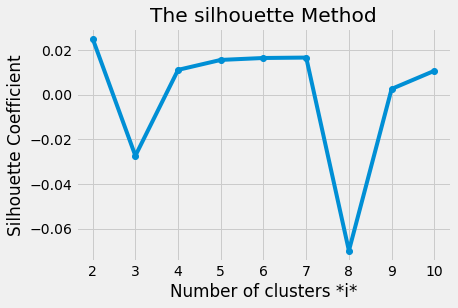

In [120]:
# silhouette coefficient
plt.style.use("fivethirtyeight")          
plt.plot(range(2, 11),silhouette_coefficients,'-o')
plt.xticks(range(2, 11))
plt.title('The silhouette Method')
plt.xlabel(r'Number of clusters *i*')
plt.ylabel('Silhouette Coefficient')
plt.savefig('elbow.png')
plt.show()

In [121]:
true_k=30
kmeans = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(countVector)


KMeans(max_iter=100, n_clusters=30, n_init=1)

In [122]:
print("========Top Terms per Cluster========")

# We look at 5 the clusters generated by k-means.
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]
terms=countVectorizer.get_feature_names()

for i in range(true_k):
    print("Cluster %d :" %i)
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind]),
        print
        
print("\n")

========Top Terms per Cluster========
Cluster 0 :
wait
repli
die
prison
cant
civil
trump
tweet
see
balloon
Cluster 1 :
via
quantamagazin
youtub
hole
black
dark
univers
new
quantum
matter
Cluster 2 :
trump
like
im
get
would
go
algiordano
vote
right
want
Cluster 3 :
vol
also
today
invest

launch
fund
sustain
esg
cefcau
Cluster 4 :
biden
republican
trump
might
news
run
iran
latest
war
let
Cluster 5 :

reuter
protest
photograph
hong
kong
captur
via
reuterspictur
document
Cluster 6 :
report
sustain

vol
newslett
today
trump
mueller
medium
publish
Cluster 7 :
fuck
like
st
get
go
loui
gener
circl
take
asshol
Cluster 8 :
fuck

trump
go
like
peopl
want
get
im
republican
Cluster 9 :

want
howard
name
guy
starbuck
face
asid
huge
campaign
Cluster 10 :

govern
today
morrison
amp
auspol
labor
like
time
peopl
Cluster 11 :
yadda
mccain
john
deserv
lose
elder
due
know
inevitablewhi
republican
Cluster 12 :
midwest
territori
senat
resid
south
caput
would
ca
fewer
per
Cluster 13 :
research
dont
sky
post
d

In [123]:

i=0
j=0
while i<30:
    while True: 
        Y=countVectorizer.transform([new_tweets.Tweet_lemmatized[j]])
        prediction= kmeans.predict(Y)
        if i == prediction:
            print("tweet of cluster " +str(prediction)+ ":"+ tweets.loc[j,"tweet"])    
            print('=========================================================')
            j=0
            break
        j+=1
    i+=1
    


tweet of cluster [0]:Is it civil to reply to Trump's tweets wait "I can't wait to see you die in prison"?
tweet of cluster [1]:"Do you really hate the Devil Rays so much that you took a shit on them via political commentary?" 

yes
tweet of cluster [2]:"Wally, are you being hyperbolic?"

No. I'm a hardcore lefty who donated to Amy Klobuchar because she doesn't use Twitter that much. And Klobuchar isn't nearly as far to the left as I am, but my heart health requires less drama from DC. Even shitheads like me learn compromise.
tweet of cluster [3]:Scanner chatter also reports looting at Walgreens.
tweet of cluster [4]:What Republican "might" Biden run with? Would he put a Republican who's backed Trump on his ticket? Because one of those Republicans will surely have supported Trump burying the anti-nuclear pact we had with Iran that's caused escalations which could lead to war.
tweet of cluster [5]:Some subsets of rioters - known as the "Black Bloc" last decade, often referred to as "Anti

tweet of cluster [29]:No one really won tonight's debate. It was a fuckfest and everyone looked bad. 

Bernie probably won't lose any ground, and since he's the frontrunner, technically that makes him the "winner". Warren didn't lose ground either - unfortunately, she didn't gain ground. 

Biden. Feh.
